# EDA to Predicton(DieTanic)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore') #주로 버전 차이에서 오는 경고 무시하기 위함
%matplotlib inline

sns.set(font_scale=1)

In [5]:
data = pd.read_csv('../input/titanic/train.csv')

In [6]:
data.isnull().sum(axis=0) #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The Age,Cabin and Embarked have null values. I will try to fix them.

# 1. How many Survived?

Text(0.5, 1.0, 'Survived')

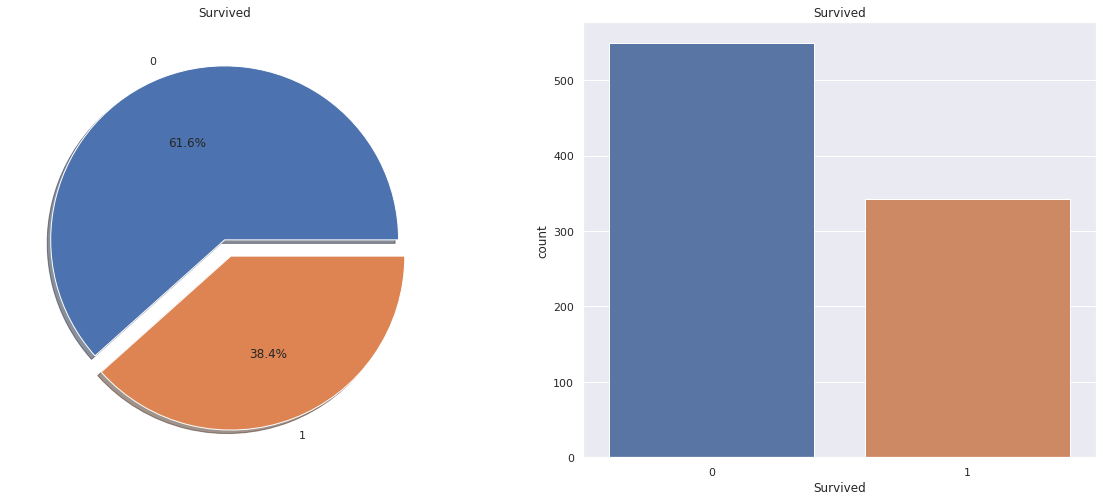

In [7]:
f,ax =plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data, ax=ax[1])
ax[1].set_title('Survived')

- it is evident that not many passengers survived the accident.

- Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

- We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

- First let us understand the different types of features.

# 2. Type Of Features

### Categorical Features:
- A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. 
- For example, gender is a categorical variable having two categories (male and female).
- Now we cannot sort or give any ordering to such variables.They are also known as Nominal Variables.
- Categorical Features in the dataset: Sex, Embarked


### Ordinal Features:
- An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. 
- For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
- Ordinal Features in the dataset : PClass

### Continuous Feature:
- A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.
- Continuous Features in the dataset: Age

# 3. Analysing The Features

### 3-1. Sex -> Categorical Feature

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

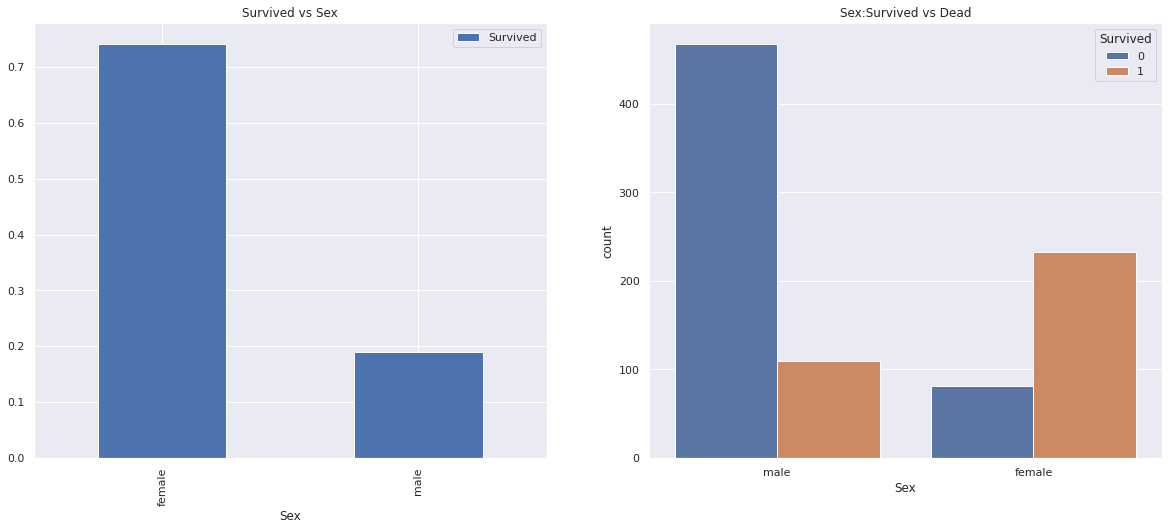

In [9]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

- This looks interesting. The number of men on the ship is lot more than the number of women, Still the number of women saved is almost twice the number of males saved. 
- The survival rates for a women on the ship is around 75% while that for men in around 18~19%.

- This looks to be a very important feature for modeling.But is it the best?? Lets check other features.

### 3-2. Pclass -> Ordinal Feature

In [10]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass: Survived vs Dead')

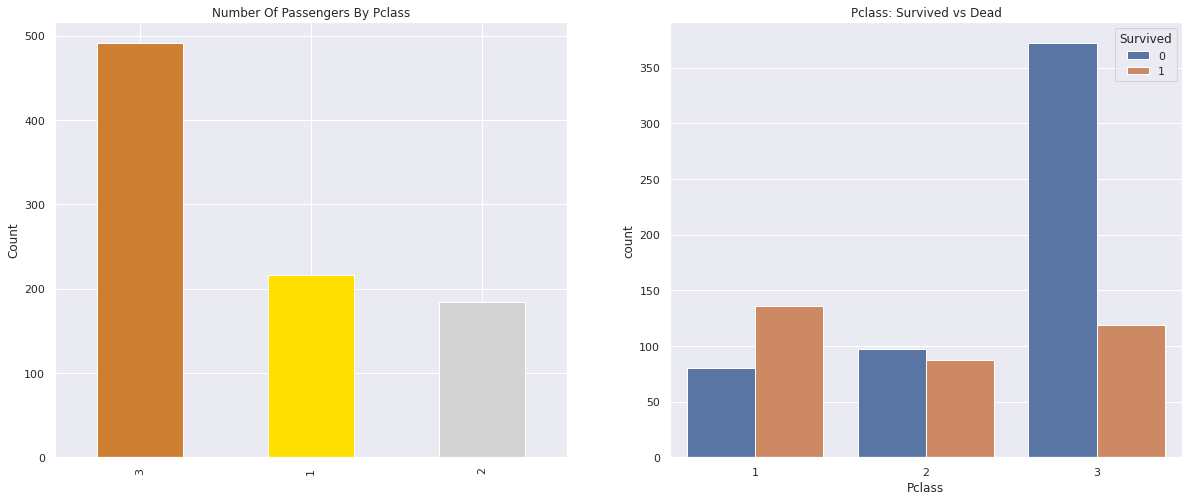

In [11]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

- People say Money Can't But Everything. But we can clearly see that Passengers Of Pclass1 were given a very high priority while rescue.
- Even though the number of Passengers in Pclass 3 were a lot higer,still the number of survival from tehm is very low, somewhere around 25%

- For Pclass1 %survied is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

- Let Dive in little bit more and check for other interesting observations.Lets check survival rate with Sex and Pclass Together.

In [12]:
pd.crosstab([data['Sex'],data['Survived']],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

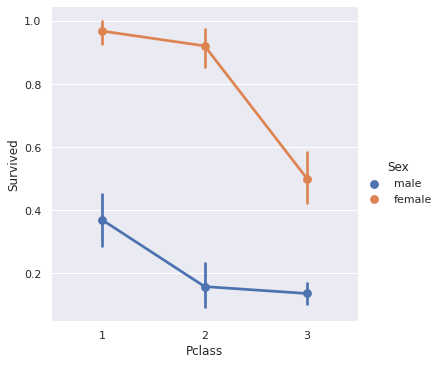

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data) #막대가 표준편차 표현, 작을 수록 신뢰

- We use FactorPlot in this case, because they make the seperation of categorical values easy.
- Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

- It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.
Looks like Pclass is also an important feature. Lets analyse other features.

### 3-3. Age -> Continuous Feature

In [14]:
print('Oldest Passenger was of:', data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship', data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship 29.69911764705882 Years


In [15]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

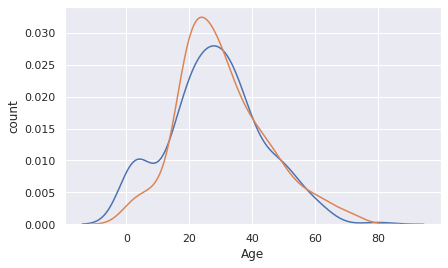

In [16]:
sns.kdeplot(data.loc[data['Survived']==1,'Age'],label= 'Survived')
sns.kdeplot(data.loc[data['Survived']==0,'Age'],label= 'Died')
plt.xlabel('Age')
plt.ylabel('count')

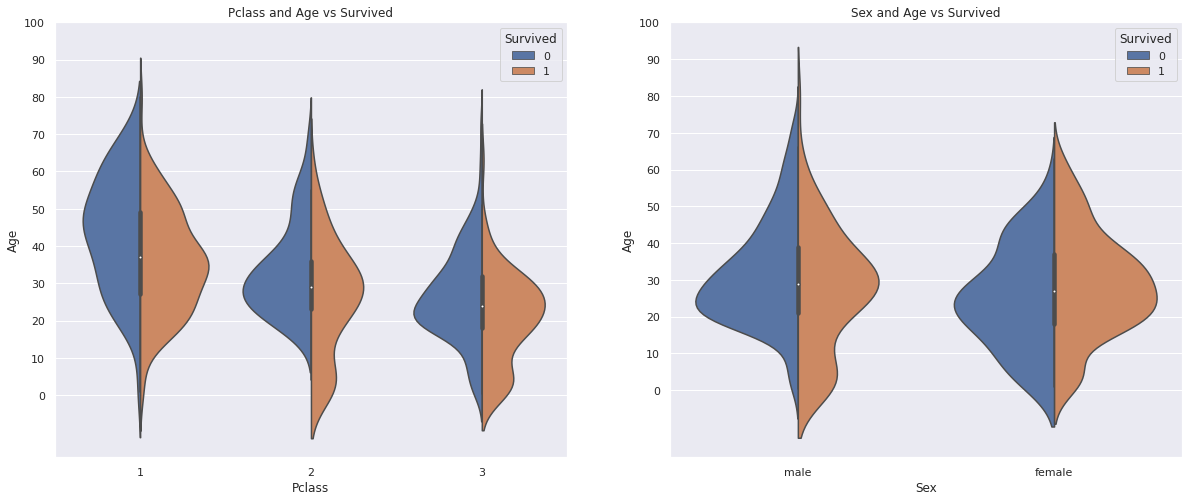

In [17]:
f,ax =plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

Observations:
- 1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

- 2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

- 3) For males, the survival chances decreases with an increase in age.

- As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.


- But the problem is, there were many people with many different ages. 


- We just can't assign a 4 year kid with the mean age that is 29 years. 
- Is there any way to find out what age-band does the passenger lie??


- Bingo!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. 
- Thus we can assign the mean values of Mr and Mrs to the respective groups.


- "What's in A Name??" ---> Feature:p

In [18]:
data['Initial']=0
for i in data:
    data['Initial'] =data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

- Okay so here we are using the Regex:[A-Za-z]+)..So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the initials from the Name.

In [19]:
pd.crosstab(data['Initial'],data['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- Okay so there are some misspelled initials like Mile or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [20]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [21]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- Filling NaN Ages

In [22]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5


In [23]:
data["Age"].isnull().any() #So no null values left finally

False

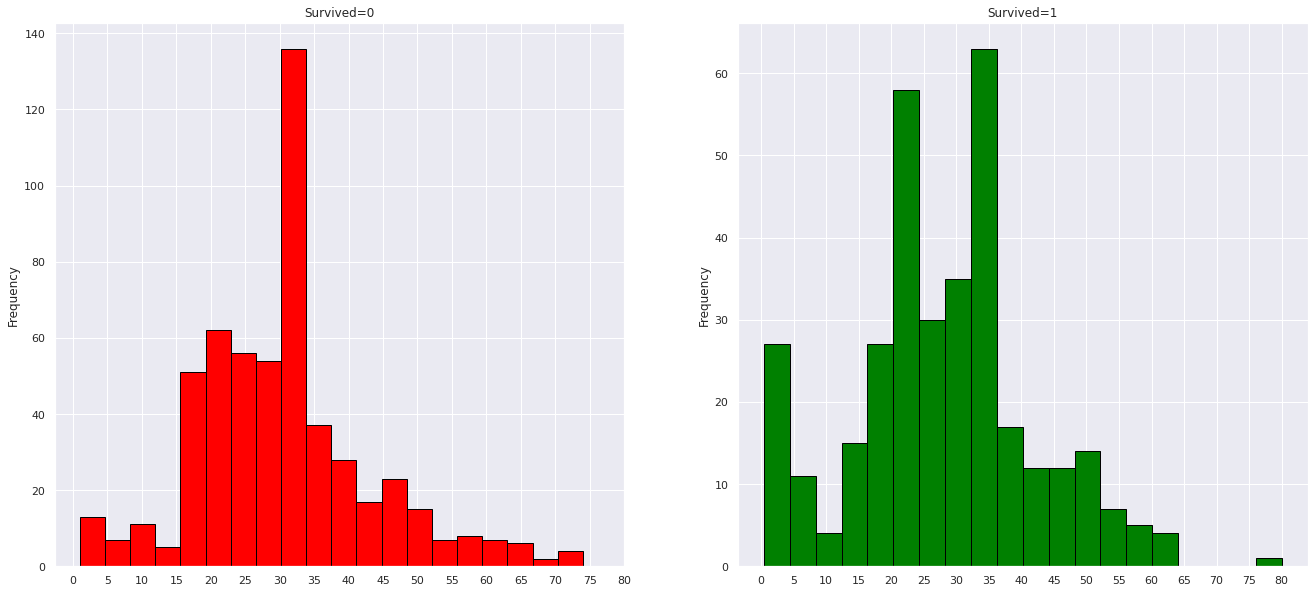

In [24]:
f,ax = plt.subplots(1,2,figsize=(20,10))

data.loc[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')

ax[0].set_title('Survived=0')

x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data.loc[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')

ax[1].set_title('Survived=1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

- Observations:
- 1) The Toddlers(age<5) were saved in large numbers(the Women and Child First Policy).
- 2) The Oldest Passenger was saved(80 years)
- 3) Maximum number of deaths were in the age group of 30-40.

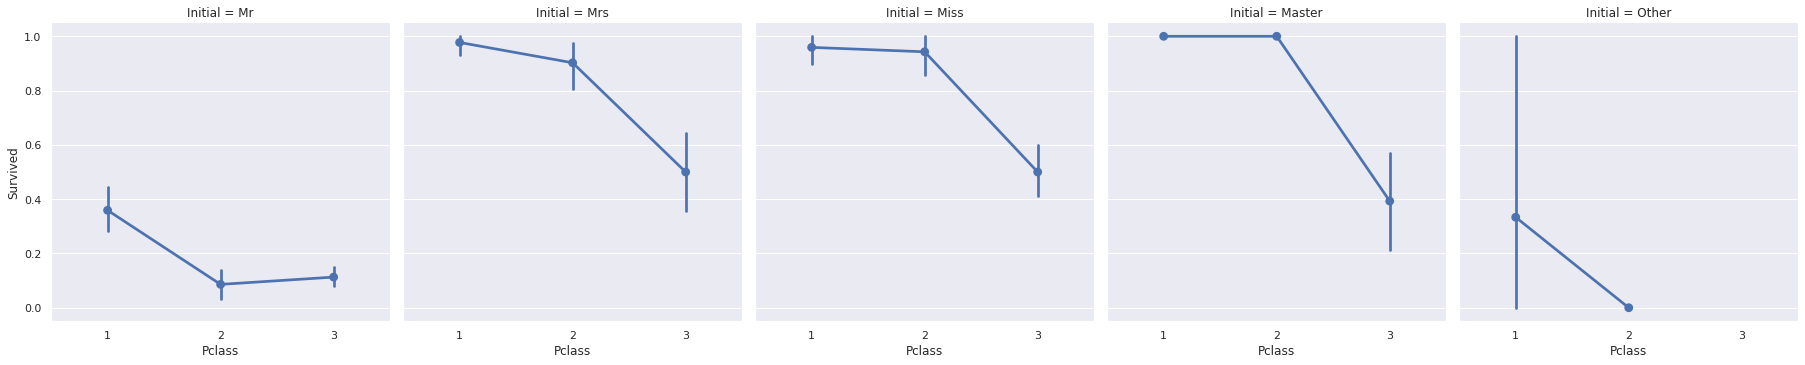

In [25]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)

- The Women and Child first policy thus holds true irrespective of the class.

### 3-4. Embarked -> Categorical Value

In [26]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins=True).style.background_gradient(cmap='summer_r')

- Chances for Survivial bu Port Of Embarkation

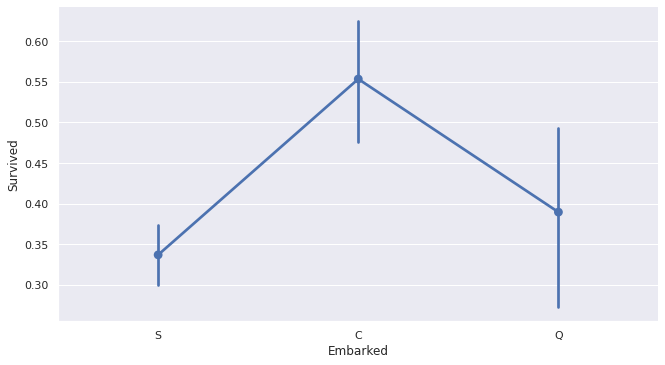

In [27]:
sns.factorplot('Embarked','Survived',data=data)
fig = plt.gcf()
fig.set_size_inches(10,5)

- The chances for survival for Port C is highest around 0.55 while it is lowest for S.

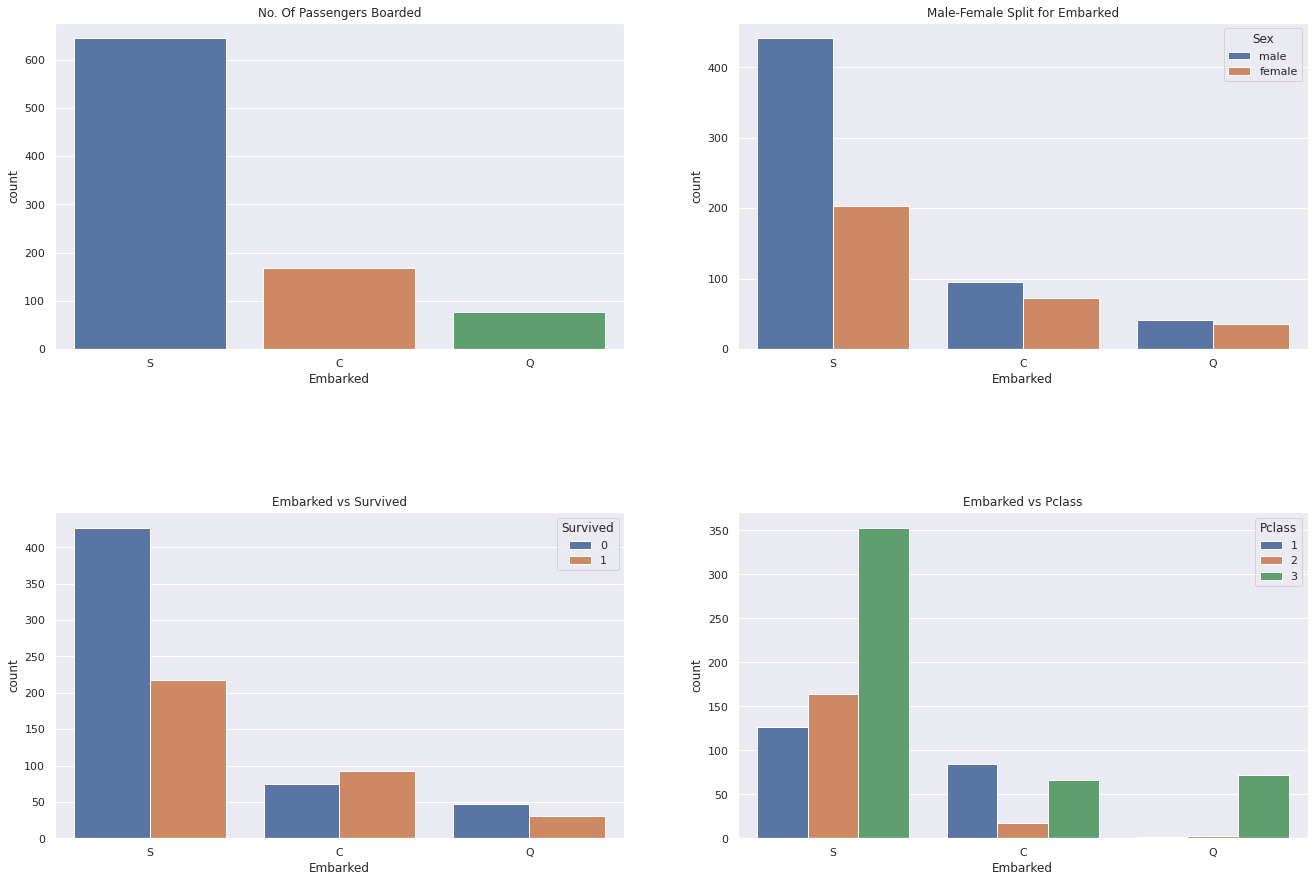

In [28]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=.2,hspace=0.5)
plt.show()

- Observations:

- 1) Maximum passengers boarded from S.Majority of them being from Pclass3.
- 2) The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.
- 3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.
- 4) Port Q had almost 95% of the passengers were from Pclass3.

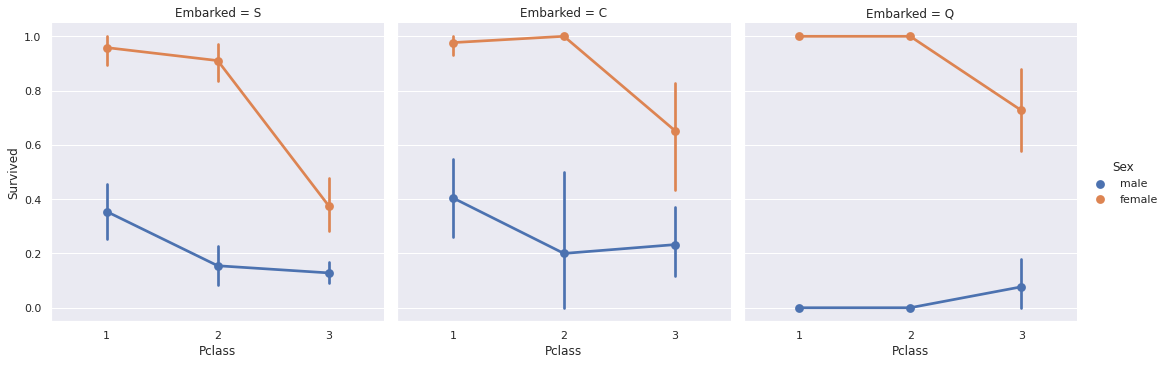

In [29]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)

<h5>Observations:</h5>
1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass (embarked 아닐까)

2) Post S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.(Money Matters)

3) Port Q looks to be unlukiest for Men, as almost all were from Pclass3.

<h5>Filling Embarked NaN</h5>
- As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [30]:
data['Embarked'].fillna('S',inplace=True)

In [31]:
data.Embarked.isnull().sum()# Finally No NaN values

0

<h3> 3.5 SibSip -> Discrete Feature</h3>

- This feature represents whether a person is alone or with his family members.
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [32]:
pd.crosstab([data['SibSp']],data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


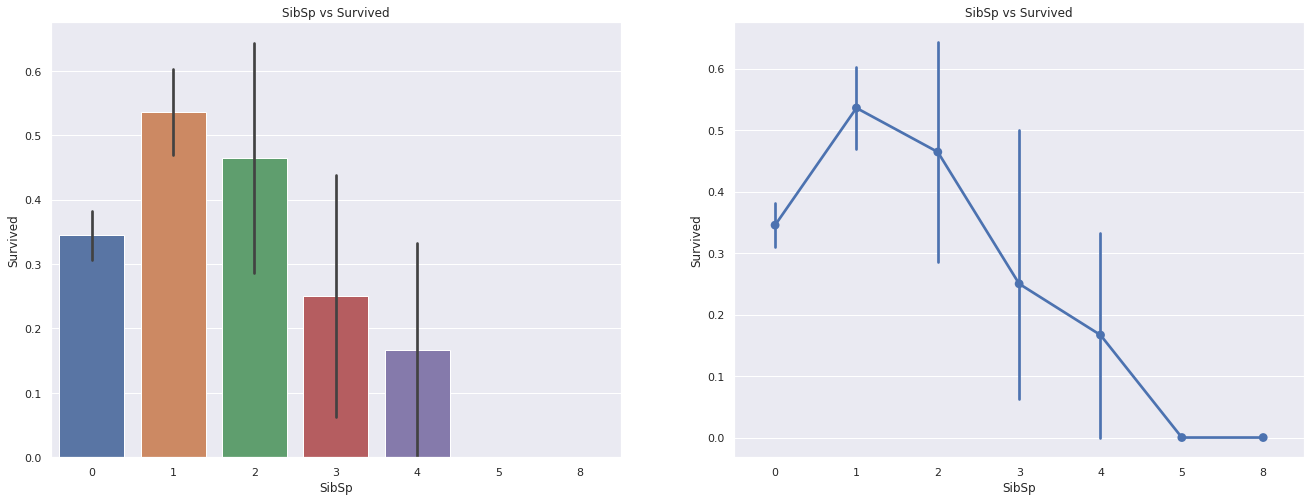

In [33]:
f,ax = plt.subplots(1,2,figsize=(20,8))

sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp','Survived',data=data,ax=ax[1]) #factorplot subplots에서 지원 X
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()

Text(0.5, 1.0, 'SibSp vs Survived')

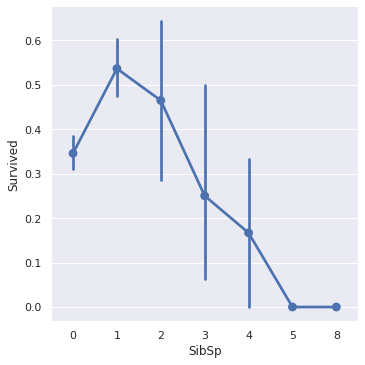

In [34]:
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[0].set_title('SibSp vs Survived')

In [35]:
pd.crosstab(data['SibSp'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


* Observations:

- The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate.
- The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first.
- Surprisingly the survived for families with 5-8 members is 0%. The reason may be Pclass??

- The reason is Pclass. The crosstab shows that Person with SibSp > 3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

#### 3-5. Parch

In [36]:
pd.crosstab(data['Parch'],data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


- The crosstab again shows that large families were in Pclass3.

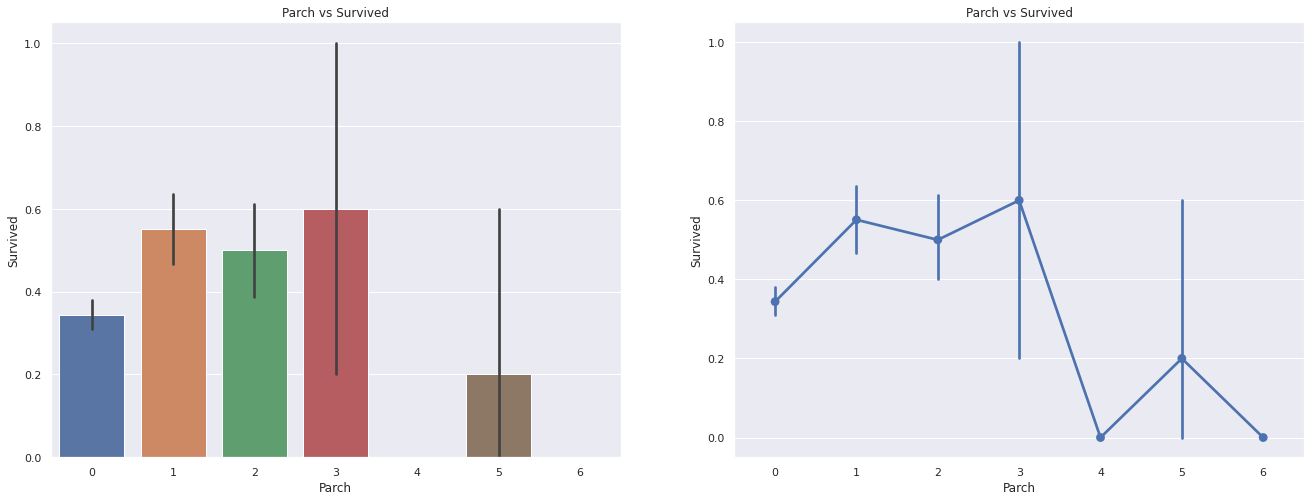

In [37]:
f, ax = plt.subplots(1,2 , figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data, ax=ax[1]) #factorplot 지원 안함
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

* Observation: 

- Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. it howevere reduces as the number goes up.

- The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### Practice of feature engineering 

In [38]:
data['new_cat_pclass_sex'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str)

<AxesSubplot:xlabel='new_cat_pclass_sex'>

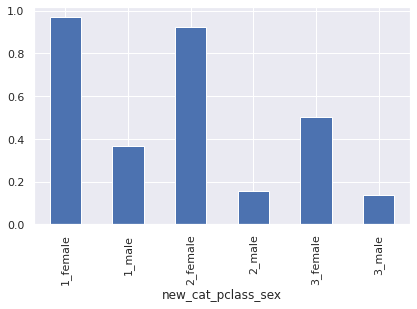

In [39]:
data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()

In [40]:
data['new_cat_pclass_sex_embarked'] = data['Pclass'].astype(str) + '_' + data['Sex'].astype(str) + '_' + data['Embarked'].astype(str)

<AxesSubplot:xlabel='new_cat_pclass_sex_embarked'>

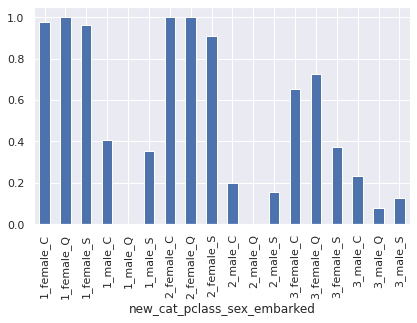

In [41]:
data.groupby('new_cat_pclass_sex_embarked')['Survived'].mean().plot.bar()

#### 3-6. Fare -> Continuous Feature

In [42]:
print('Highest Fare was:' , data['Fare'].max())
print('Lowest Fare was:' , data['Fare'].min())
print('Average Fare was:' , data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


- The lowest fare is <b>0.0</b>.  WoW!! a free luxorious ride.

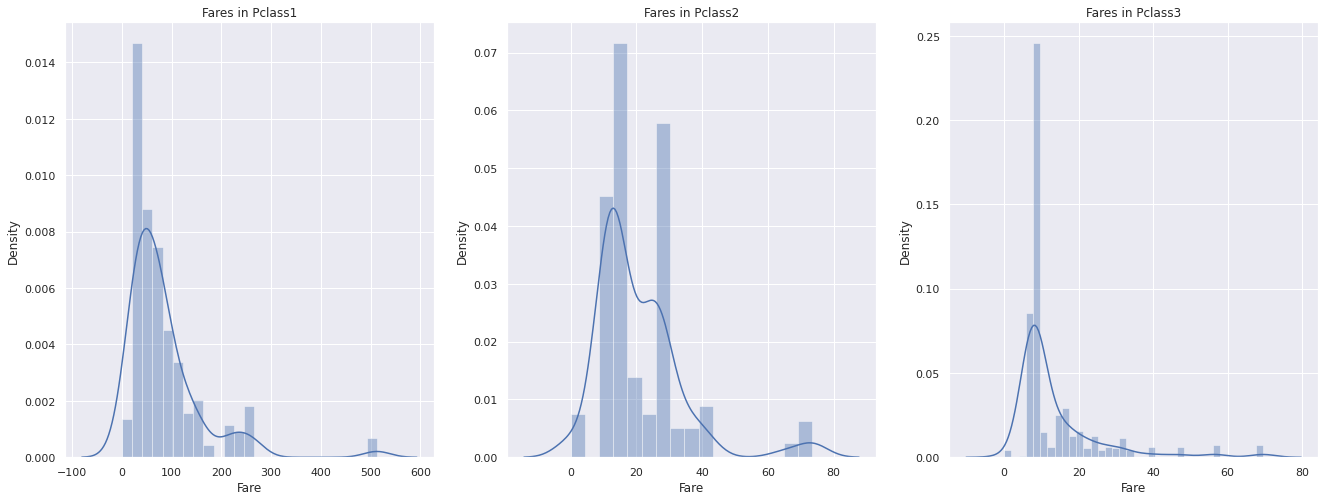

In [43]:
f, ax = plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass3')
plt.show()

- There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standard reduces. As this is also continuous, we can convert into discreate values by using binning.

<h2>Observations in a Nutshell for all features: </h2>

<b>Sex: </b> The chance of survival for women is high as compared to men.

<b>Pclass</b>: There is a visible trend th</b>at being a <b>1st class passenger</b> gives you better chances of survival. The survival rate for <b>Pclass3 is very low.</b> For <b>women,</b> the chance of survival from <b>Pclass1</b> is almost 1 and is high too for those from <b>Pclass2. Money Wins!!!.</b>

<b>Age</b>: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

<b>Embarked</b>: This is a very interesting feature. <b>The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.</b>
Passengers at Q were all from <b>Pclass3.</b>

<b>Parch + SibSp: </b> Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probability rather than being alone or having a large family travelling with you.

#### Correlation Between The Features

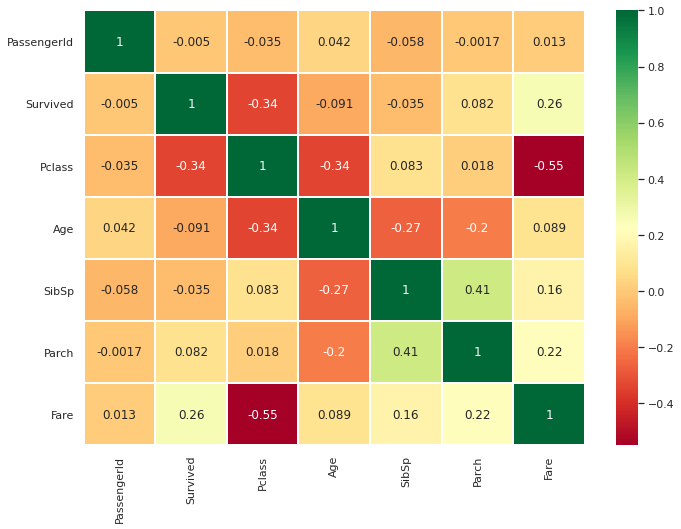

In [44]:
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn',linewidth=0.2)
#data.corr() ---> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Interpreting The Heatmap

- The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. 
- Before understanding the plot, let us see what exactly correlation is.

- <b>POSITIVE CORRELATION:</b> If an <b>increase in feature A leads to increase in feature B, then they are positively correlated.</b> A value <b>1 means perfect positive correlation.</b>

- <b>NEGATIVE CORRELATION:</b> If an <b>increase in feature A leads to decrease in featureB, then they are negatively correlated.</b> A value <b>-1 means perfect negative correlation.</b>

- Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. 
- This is known as <b>MultiColinearity</b> as both of them contains almost the same information.

- So do you think we should use both of them as <b>one of them is redundant.</b> While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

- Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between <b>SibSp and Parch i.e 0.41</b>. So we can carry on with all features.

# Part2: Feature Engineering and Data Cleaning

- Now what is Feature Engineering?

- Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

- An example would be getting the Initials feature using the Name Feature. 
- Lets see if we can get any new features and eliminate a few. Also we will transform the existing relevant features to suitable form for Predicitive Modeling.



### Age_ band

<h4>Problem with age features:</h4>
- As I have mentioned earlier that <b>Age is a continuous features</b>, there is a problem with Continuous features in machine learning models.

- <b>Eg:</b> If I say to group or arrange Sports Person by <b>Sex</b>, We cam easily segregate them by Male and Female.

- Now if I say to group them by their <b>Age</b>, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

- We need to convert these <b>continuous values into categorical values</b> by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

- Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5 = 16. So bins of size 16.

In [45]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16) &(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2


In [46]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer') #checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


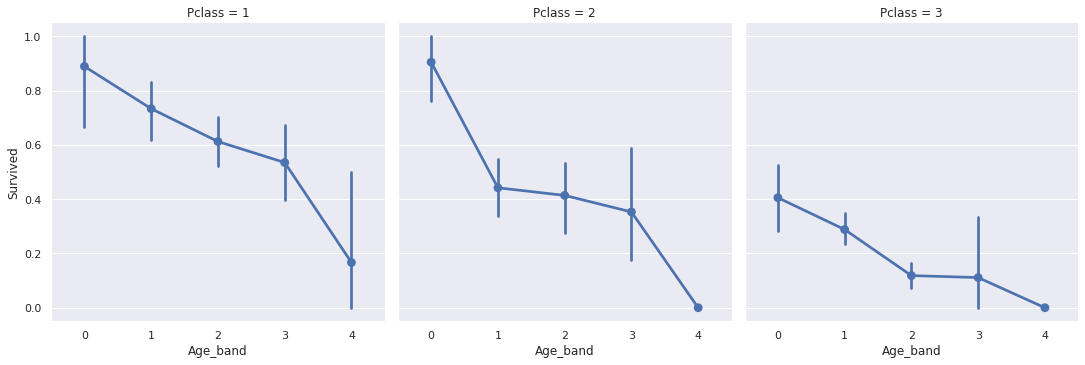

In [47]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')

- True that.. the survival rate decreases as the age increases irrespective of the Pclass.

### Family_Size and Alone

- At this point, we can create a new feature called "Family_Size" and "Alone" and analyse it.
- This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [48]:
data['Family_Size']=0
data['Family_Size']=data['Parch'] + data['SibSp'] #Family_Size 

data['Alone']=0
data.loc[data['Family_Size']==0,'Alone']=1 #Alone

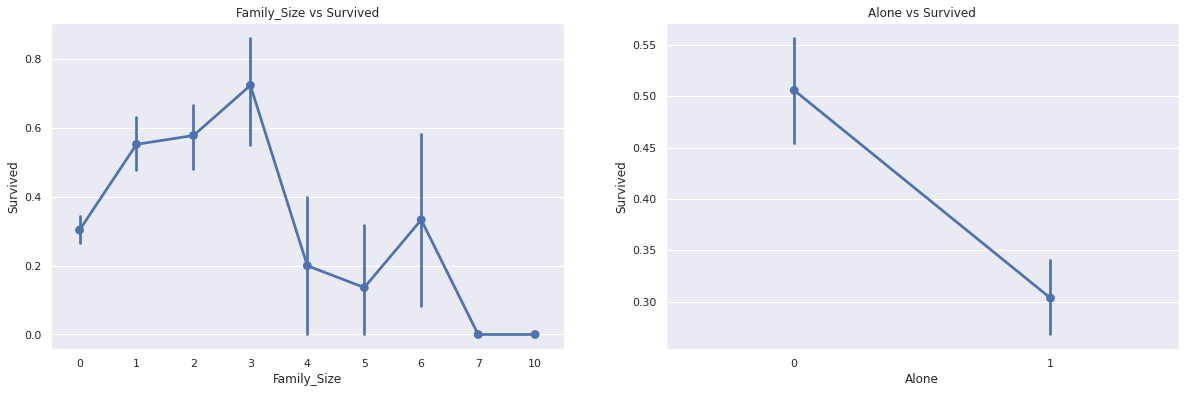

In [49]:
f,ax = plt.subplots(1,2,figsize=(18,6))
sns.pointplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

- <b>Family_Size=0 means that the passengers is alone</b>. Clearly, if you are alone or family_size = 0, then chances for survival is very low. 
- For family size>= 4. the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

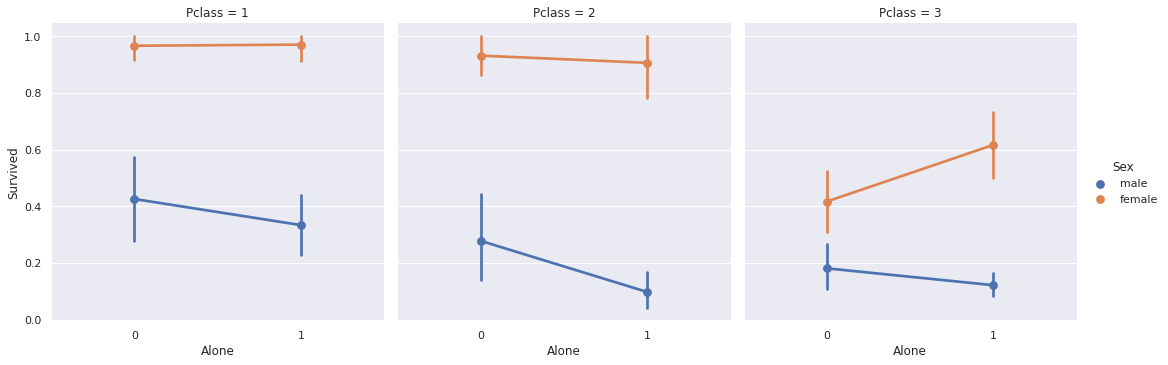

In [50]:
sns.factorplot('Alone','Survived',col='Pclass',data=data,hue='Sex')

- It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range
- Since fare is also a continuous feature, we need to convert it into ordinal value. For this we will use <b>pandas.quct.</b>

- So what <b>quct</b> does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [51]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- As discussed above, we can clearly see that as the <b>fare_range increases, the chances of survival increases.</b>

- Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in <b>Age_Band</b>

In [52]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31.0),'Fare_cat']=2
data.loc[(data['Fare']>31.0) & (data['Fare']<=513),'Fare_cat']=3

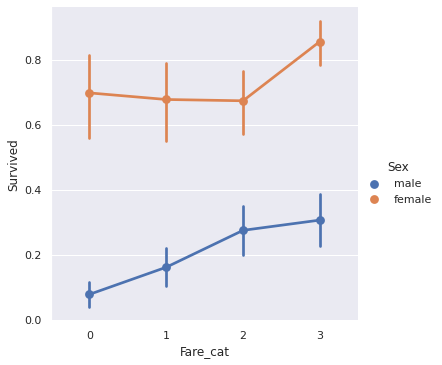

In [53]:
sns.factorplot('Fare_cat','Survived',hue='Sex',data=data)

- Clearly, as the Fare_cat increases,the survival chances increases. This feature may become an important feature during modeling along with the Sex.

## Converting String Values into Numeric

- Since we cannot pass strings to a machine learning model, we need to convert features look Sex,Embarked,ext into numeric values.

In [54]:
#라벨 인코더 사용
from sklearn.preprocessing import LabelEncoder

cat_cols = [col for col in data.columns if data[col].dtypes == 'object']

In [55]:
for col in ['Sex','Embarked','Initial']:
    encoder = LabelEncoder()
    data[col]= encoder.fit_transform(data[col])

In [56]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping UnNeeded Features

- Name -> We don't need name feature as it cannot be converted into any categorical value.

- Age -> We have the Age_band feature, so no need of this.

- Ticket -> It is any random string that cannot be categorised.

- Fare -> We have the Fare_cat feature, so unneeded

- Cabin -> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

- Fare_Range -> We have the fare_cate feature.

- PassengerId -> Cannot be categorised.

In [57]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)


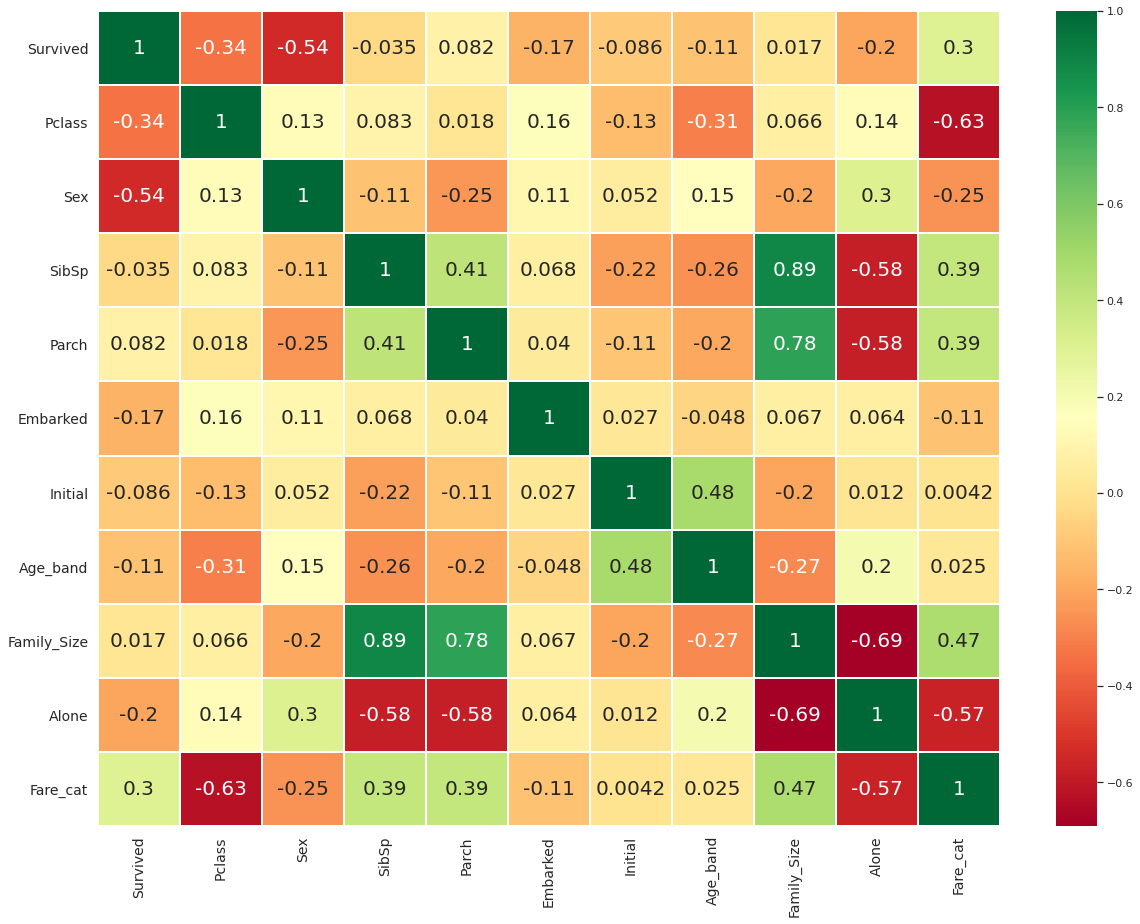

In [139]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig= plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Now the above correlation plot, we can see some positively related features.
- Some of them being <b>SibSp and Family_Size and Parch and Family_Size</b> and some negative ones like <b>Alone and Family_Size</b>

# Part3: Predictive Modeling

- We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survived or die.
- So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms. Following are the algorithms I will use to make the model:

- 1) Logistic Regression

- 2) Support Vector Machines(Linear and radial)

- 3) Random Forest

- 4) K-Nearest Neighbors

- 5) Naive Bayes

- 6) Decision Tree

- 7) Logistic Regression

In [147]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,1,1,0,2,2,1,1,0,0
1,1,1,0,1,0,0,3,2,1,0,3
2,1,3,0,0,0,2,1,1,0,1,1
3,1,1,0,1,0,2,3,2,1,0,3
4,0,3,1,0,0,2,2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,2,4,1,0,1,1
887,1,1,0,0,0,2,1,1,0,1,2
888,0,3,0,1,2,2,1,1,3,0,2
889,1,1,1,0,0,0,2,1,0,1,2


In [59]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


In [144]:
train , test = train_test_split(data,test_size=0.3 , random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### 1.Radial Support Vector Machines(rbf-SVM)

In [136]:
model = svm.SVC(kernel='rbf',C=1, gamma=0.1,probability=True)
model.fit(train_X,train_Y)
#prediction1=model.predict(test_X)
prediction1 = model.predict_proba(test_X)[:,1] > 0.46
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8395522388059702


### 추가 공부 : 모델 최적의 쓰레스홀더 찾기

In [80]:
model =svm.SVC(kernel='rbf',C=1,gamma=0.1, probability=True)
model.fit(train_X,train_Y)

SVC(C=1, gamma=0.1, probability=True)

In [95]:
prediction1=model.predict(test_X)

In [125]:
score_array = []
for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    prediction1= (model.predict_proba(test_X)[:,1] > threshold).astype(int) #쓰레스 홀드에 따라 예상값이 달라짐 -> 그에 따라 정확도도 달라진다.
    temp_score = 100 * metrics.accuracy_score(prediction1,test_Y)
    print(temp_thres,'Accuracy for rbf SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for rbf SVM is 38.43%
0.01 Accuracy for rbf SVM is 38.43%
0.02 Accuracy for rbf SVM is 38.43%
0.03 Accuracy for rbf SVM is 38.43%
0.04 Accuracy for rbf SVM is 38.43%
0.05 Accuracy for rbf SVM is 38.43%
0.06 Accuracy for rbf SVM is 38.43%
0.07 Accuracy for rbf SVM is 38.43%
0.08 Accuracy for rbf SVM is 38.43%
0.09 Accuracy for rbf SVM is 38.43%
0.1 Accuracy for rbf SVM is 38.43%
0.11 Accuracy for rbf SVM is 38.43%
0.12 Accuracy for rbf SVM is 40.67%
0.13 Accuracy for rbf SVM is 41.04%
0.14 Accuracy for rbf SVM is 42.91%
0.15 Accuracy for rbf SVM is 74.63%
0.16 Accuracy for rbf SVM is 77.24%
0.17 Accuracy for rbf SVM is 79.10%
0.18 Accuracy for rbf SVM is 80.60%
0.19 Accuracy for rbf SVM is 80.97%
0.2 Accuracy for rbf SVM is 80.97%
0.21 Accuracy for rbf SVM is 81.34%
0.22 Accuracy for rbf SVM is 80.97%
0.23 Accuracy for rbf SVM is 81.72%
0.24 Accuracy for rbf SVM is 81.72%
0.25 Accuracy for rbf SVM is 81.72%
0.26 Accuracy for rbf SVM is 81.72%
0.27 Accuracy for rbf SVM is 82

Text(0, 0.5, 'accuracy score')

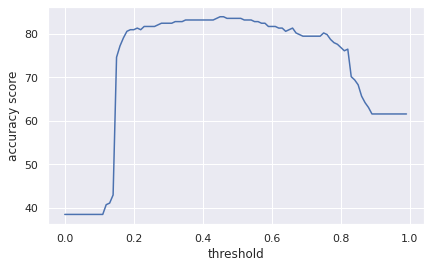

In [121]:
plt.plot(np.arange(0,1,0.01),score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [122]:
np.argmax(score_array)

45

#### Tip : 위에서 feature engineering 하면서 추가된 column 값 제거하고 다시 data validation하고 model 돌려보기

In [70]:
del data['new_cat_pclass_sex']
del data['new_cat_pclass_sex_embarked']

KeyError: 'new_cat_pclass_sex'

In [64]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,1,1,0,2,2,1,1,0,0
1,1,1,0,1,0,0,3,2,1,0,3
2,1,3,0,0,0,2,1,1,0,1,1
3,1,1,0,1,0,2,3,2,1,0,3
4,0,3,1,0,0,2,2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,2,4,1,0,1,1
887,1,1,0,0,0,2,1,1,0,1,2
888,0,3,0,1,2,2,1,1,3,0,2
889,1,1,1,0,0,0,2,1,0,1,2


#### Tip2 : Feature 들을 잘 정리해놔야한다.
- eg) 
- categorical_features = ['Pclass','Sex', 'age_cat']
- numerical_features = ['Age', 'Fare'] 

### 2. Linear Support Vector Machine(linear-SVM)

In [137]:
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1,probability=True)
model.fit(train_X,train_Y)
#prediction2 = model.predict(test_X)
prediction2 = model.predict_proba(test_X)[:,1] > 0.70
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8022388059701493


In [129]:
score_array = []
for temp_thres in np.arange(0,1,0.01):
    threshold = temp_thres
    prediction2= (model.predict_proba(test_X)[:,1] > threshold).astype(int) #쓰레스 홀드에 따라 예상값이 달라짐 -> 그에 따라 정확도도 달라진다.
    temp_score = 100 * metrics.accuracy_score(prediction2,test_Y)
    print(temp_thres,'Accuracy for linear SVM is {:.2f}%'.format(temp_score))
    score_array.append(temp_score)

0.0 Accuracy for linear SVM is 38.43%
0.01 Accuracy for linear SVM is 38.43%
0.02 Accuracy for linear SVM is 38.43%
0.03 Accuracy for linear SVM is 38.43%
0.04 Accuracy for linear SVM is 38.43%
0.05 Accuracy for linear SVM is 38.43%
0.06 Accuracy for linear SVM is 38.43%
0.07 Accuracy for linear SVM is 38.43%
0.08 Accuracy for linear SVM is 38.81%
0.09 Accuracy for linear SVM is 38.81%
0.1 Accuracy for linear SVM is 38.81%
0.11 Accuracy for linear SVM is 38.81%
0.12 Accuracy for linear SVM is 39.55%
0.13 Accuracy for linear SVM is 40.67%
0.14 Accuracy for linear SVM is 40.67%
0.15 Accuracy for linear SVM is 40.67%
0.16 Accuracy for linear SVM is 40.67%
0.17 Accuracy for linear SVM is 41.42%
0.18 Accuracy for linear SVM is 41.42%
0.19 Accuracy for linear SVM is 68.28%
0.2 Accuracy for linear SVM is 78.73%
0.21 Accuracy for linear SVM is 78.73%
0.22 Accuracy for linear SVM is 79.10%
0.23 Accuracy for linear SVM is 79.10%
0.24 Accuracy for linear SVM is 79.10%
0.25 Accuracy for linear SVM

Text(0, 0.5, 'accuracy score')

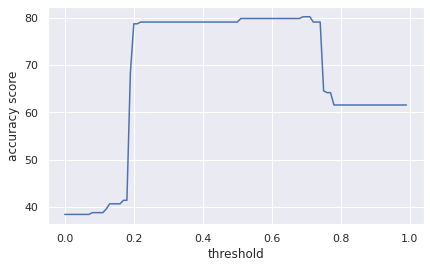

In [131]:
plt.plot(np.arange(0,1,0.01),score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy score')

In [130]:
np.argmax(score_array)

69

### 3. Logistic Regression

In [138]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8022388059701493


### 4. Decision Tree

In [142]:
model = DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7985074626865671


### 5. K-Nearest Neighbors(KNN)

In [149]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.776536312849162


- Now the accuracy for the KNN model changes as we change the values for n_neighbors attribute.
- The default value is 5. Lets check the accuracies over various values of n_neighbors